In [2]:
import numpy as np
import pandas as pd

In [3]:
# let say we have 10 rows and 5 features (5-D) and we  need to reduce them to 2-D

data = {
    'X1': [2.5, 3.0, 2.7, 3.2, 2.9, 3.4, 2.6, 3.1, 2.8, 3.3],
    'X2': [3.0, 3.4, 3.2, 3.8, 3.5, 4.0, 3.1, 3.7, 3.3, 3.9],
    'X3': [2.8, 3.1, 3.0, 3.3, 3.2, 3.5, 2.9, 3.4, 3.1, 3.6],
    'X4': [4.5, 4.9, 4.6, 5.1, 4.8, 5.3, 4.4, 5.0, 4.7, 5.2],
    'X5': [5.1, 5.3, 5.0, 5.6, 5.2, 5.7, 4.9, 5.4, 5.1, 5.5]
}

df = pd.DataFrame(data)
print(df)


    X1   X2   X3   X4   X5
0  2.5  3.0  2.8  4.5  5.1
1  3.0  3.4  3.1  4.9  5.3
2  2.7  3.2  3.0  4.6  5.0
3  3.2  3.8  3.3  5.1  5.6
4  2.9  3.5  3.2  4.8  5.2
5  3.4  4.0  3.5  5.3  5.7
6  2.6  3.1  2.9  4.4  4.9
7  3.1  3.7  3.4  5.0  5.4
8  2.8  3.3  3.1  4.7  5.1
9  3.3  3.9  3.6  5.2  5.5


In [4]:
# Step -1 mean centering 
for col in df.columns:
    df[col]=df[col] - df[col].mean()

df.head()

,X1,X2,X3,X4,X5
0,-0.45,-0.49,-0.39,-0.35,-0.18
1,0.05,-0.09,-0.09,0.05,0.02
2,-0.25,-0.29,-0.19,-0.25,-0.28
3,0.25,0.31,0.11,0.25,0.32
4,-0.05,0.01,0.01,-0.05,-0.08


In [6]:
# step -2 Convariance Matrix
n=df.shape[0]
cov_mat= (1/(n-1))*(df.T@df)
cov_mat

,X1,X2,X3,X4,X5
X1,0.091667,0.103889,0.075000,0.090556,0.075556
X2,0.103889,0.121000,0.087667,0.102778,0.086444
X3,0.075000,0.087667,0.067667,0.073889,0.058667
X4,0.090556,0.102778,0.073889,0.091667,0.077778
X5,0.075556,0.086444,0.058667,0.077778,0.070667


In [7]:
# step -3 finding eigen value and eigen vectors
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors (each column is a vector):\n", eigenvectors)

Eigenvalues:
 [4.27647367e-01 1.13347640e-02 1.92661319e-04 1.97675754e-03
 1.51511678e-03]

Eigenvectors (each column is a vector):
 [[-0.46017598  0.04203021  0.44066278  0.57458963  0.51199081]
 [-0.52884708  0.20224212 -0.41664526 -0.53567622  0.46784249]
 [-0.38236078  0.63896886  0.35499497 -0.13645026 -0.54852432]
 [-0.45982629 -0.20421535 -0.59129819  0.4721527  -0.41748551]
 [-0.38848275 -0.71228258  0.39568681 -0.37596661 -0.20932208]]


In [12]:
# step -4 finding top k (say 2) eigen values and their corresponding eigne vectors

k=2
# sorting in descending order
sorted_indices=np.argsort(eigenvalues)[::-1]
topk_indices=sorted_indices[:k]

# Select top k eigenvalues and eigenvectors

topk_eigenvalues=eigenvalues[topk_indices]
topk_eigenvectors=eigenvectors[:,topk_indices]

print(f"Top {k} eigen values: {topk_eigenvalues}")
print(f"Top {k} eigen vectors:\n{topk_eigenvectors}")


Top 2 eigen values: [0.42764737 0.01133476]
Top 2 eigen vectors:
[[-0.46017598  0.04203021]
 [-0.52884708  0.20224212]
 [-0.38236078  0.63896886]
 [-0.45982629 -0.20421535]
 [-0.38848275 -0.71228258]]


In [14]:
# Projections

pca_df=df @ topk_eigenvectors

pca_df

,0,1
0,0.846201,-0.167524
1,0.028239,-0.098064
2,0.564790,0.059931
3,-0.560317,-0.135495
4,0.067967,0.073504
5,-0.965408,-0.070918
6,0.832742,0.083678
7,-0.375972,0.066853
8,0.342821,0.056605
9,-0.781062,0.131430


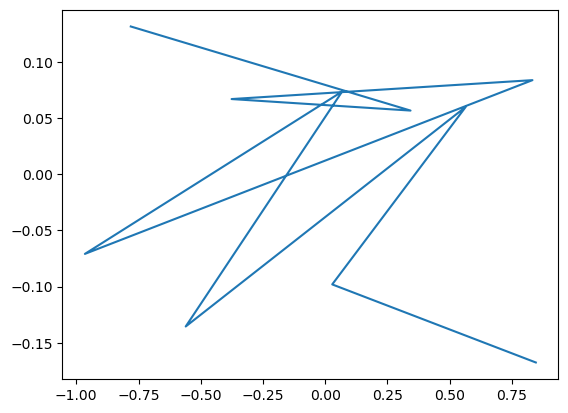

In [17]:
import matplotlib.pyplot as plt 

plt.plot(pca_df.iloc[:,0],pca_df.iloc[:,1])
plt.show()